In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
with open("/content/drive/MyDrive/summaries/Summary_Bart.txt", "r") as f:
    bart_summary = f.read()

with open("/content/drive/MyDrive/summaries/Summary_t5.txt", "r") as f:
    t5_summary = f.read()

with open("/content/drive/MyDrive/summaries/Summary_pegasus.txt", "r") as f:
    pegasus_summary = f.read()

In [ ]:
import re

def extract_latencies(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            if "Latencies :" in line:
                # Use regex to extract list part only
                match = re.search(r"\[.*?\]", line)
                if match:
                    return eval(match.group())  # You can also use literal_eval for safety

# Load latencies from all three files
bart_latencies = extract_latencies("/content/drive/MyDrive/latencies/latency_Bart.txt")
t5_latencies = extract_latencies("/content/drive/MyDrive/latencies/latency_t5.txt")
pegasus_latencies = extract_latencies("/content/drive/MyDrive/latencies/latency_pegasus.txt")

# Print to verify
print("Bart:", bart_latencies)
print("T5:", t5_latencies)
print("Pegasus:", pegasus_latencies)


Bart: [23.279328107833862, 17.719146251678467, 18.098053693771362, 16.910552978515625, 12.985599756240845]
T5: [14.086961269378662, 12.60811710357666, 14.28424882888794, 16.256747484207153, 8.598206281661987]
Pegasus: [18.713342905044556, 18.968865156173706, 25.282150983810425, 28.336583614349365, 14.529189348220825]


In [ ]:
print("BART Summary:\n", bart_summary)
print("T5 Summary: \n", t5_summary)
print("PEGASUS Summary: \n",pegasus_summary)


BART Summary:
 Everybody's talking about artificial intelligence these days. Are they the same thing or are they different? And if so, what are those differences? And deep learning is another one that comes into play. We're going to take a look at that in this video and try to explain how all these technologies relate. Machine learning is, as its name implies, the machine is learning. I don't have to program it. I give it lots of information and it observes things. Machine learning really came along and became more popularized in this time frame. The next layer of our Venn diagram involves deep learning. With deep learning we use these things called neural networks. Neural networks are ways that in a computer we simulate and mimic the way the human brain works. Generative AI can generate new content out of existing information. This is where chat bots and all of these things come from. Other types of models are audio models, video models, and things like that. In the early days, AI's a

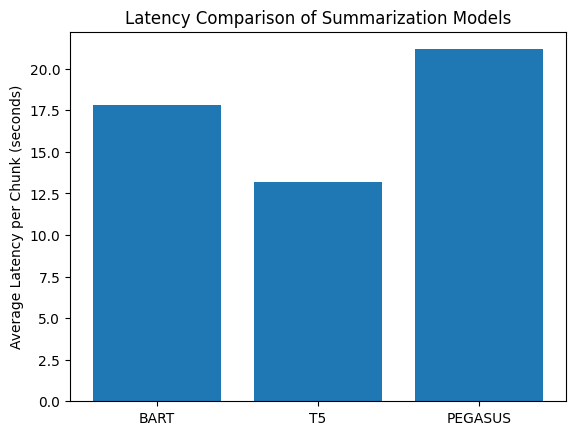

In [ ]:
models = ['BART', 'T5', 'PEGASUS']
avg_latencies = [
    sum(bart_latencies)/len(bart_latencies),
    sum(t5_latencies)/len(t5_latencies),
    sum(pegasus_latencies)/len(pegasus_latencies)
]

plt.bar(models, avg_latencies)
plt.ylabel("Average Latency per Chunk (seconds)")
plt.title("Latency Comparison of Summarization Models")
plt.show()


In [ ]:
import os
import numpy as np

import re

def read_latencies(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            if "Latencies :" in line:
                match = re.search(r"\[.*\]", line)
                if match:
                    return eval(match.group())
    return []


bart_latencies = read_latencies("/content/drive/MyDrive/latencies/latency_Bart.txt")
t5_latencies = read_latencies("/content/drive/MyDrive/latencies/latency_t5.txt")
pegasus_latencies = read_latencies("/content/drive/MyDrive/latencies/latency_pegasus.txt")

def compute_avg_total(latencies):
    total = sum(latencies)
    avg = total / len(latencies)
    return avg, total

bart_avg, bart_total = compute_avg_total(bart_latencies)
t5_avg, t5_total = compute_avg_total(t5_latencies)
peg_avg, peg_total = compute_avg_total(pegasus_latencies)

def get_size_bits(file_path):
    size_bytes = os.path.getsize(file_path)
    return size_bytes * 8  # bytes to bits

bart_bits = get_size_bits("/content/drive/MyDrive/summaries/Summary_Bart.txt")
t5_bits = get_size_bits("/content/drive/MyDrive/summaries/Summary_t5.txt")
peg_bits = get_size_bits("/content/drive/MyDrive/summaries/Summary_pegasus.txt")

low_bw = 256_000
high_bw = 10_000_000

bart_tx_low = bart_bits / low_bw
t5_tx_low   = t5_bits / low_bw
peg_tx_low  = peg_bits / low_bw

bart_tx_high = bart_bits / high_bw
t5_tx_high   = t5_bits / high_bw
peg_tx_high  = peg_bits / high_bw

bart_total_low = bart_total + bart_tx_low
t5_total_low   = t5_total + t5_tx_low
peg_total_low  = peg_total + peg_tx_low

bart_total_high = bart_total + bart_tx_high
t5_total_high   = t5_total + t5_tx_high
peg_total_high  = peg_total + peg_tx_high

import pandas as pd

df = pd.DataFrame({
    "Model": ["BART", "T5", "Pegasus"],
    "Avg Latency (s)": [bart_avg, t5_avg, peg_avg],
    "Total Latency (s)": [bart_total, t5_total, peg_total],
    "Total Time Low BW (s)": [bart_total_low, t5_total_low, peg_total_low],
    "Total Time High BW (s)": [bart_total_high, t5_total_high, peg_total_high],
})

print(df)


     Model  Avg Latency (s)  Total Latency (s)  Total Time Low BW (s)  \
0     BART        34.368979         103.106938             103.146813   
1       T5        26.842003          80.526008              80.560633   
2  Pegasus        53.984861         161.954583             161.999521   

   Total Time High BW (s)  ROUGE-F1  
0              103.107959     0.206  
1               80.526894     0.211  
2              161.955734     0.087  


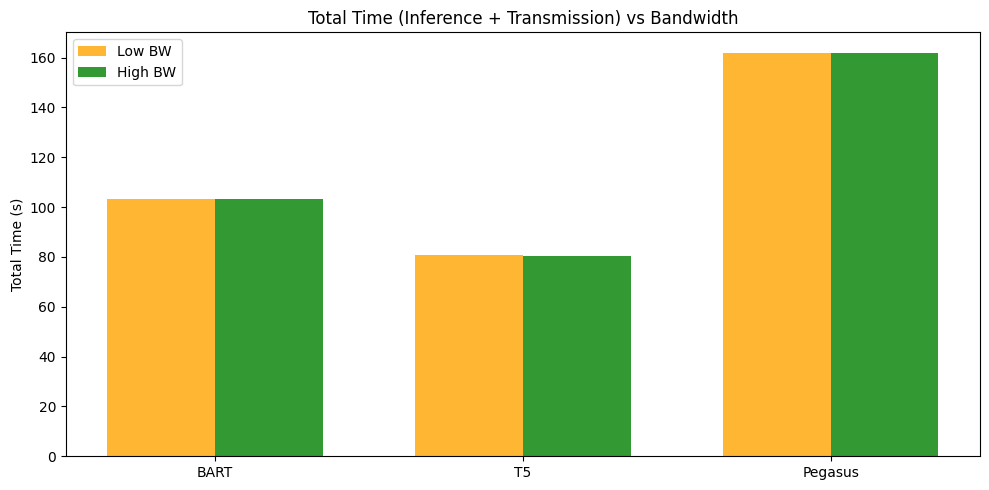

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    "Model": ["BART", "T5", "Pegasus"],
    "Avg Latency (s)": [34.368979, 26.842003, 53.984861],
    "Total Latency (s)": [103.106938, 80.526008, 161.954583],
    "Total Time Low BW (s)": [103.146813, 80.560633, 161.999521],
    "Total Time High BW (s)": [103.107959, 80.526894, 161.955734],
    "ROUGE-F1": [0.206, 0.211, 0.087]
}

df = pd.DataFrame(data)

x = np.arange(len(df["Model"]))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, df["Total Time Low BW (s)"], width, label="Low BW", color='orange', alpha=0.8)
plt.bar(x + width/2, df["Total Time High BW (s)"], width, label="High BW", color='green', alpha=0.8)

plt.xticks(x, df["Model"])
plt.ylabel("Total Time (s)")
plt.title("Total Time (Inference + Transmission) vs Bandwidth")
plt.legend()
plt.tight_layout()
plt.show()
